# Evaluation Dataset

## Downloads

In this notebook we create a dataset used to make the virtual documents, and create csv files from text files for query evaluation.

The resulting dataset is created from the [2015-10 DBPedia snapshot](http://downloads.dbpedia.org/wiki-archive/Downloads2015-10.html). As indicated in the paper by [Hasibi et al.](https://hasibi.com/files/sigir2017-dbpedia_entity.pdf), only the `<rdfs:comment>`
and `<rdfs:label>` are used for the relevancy assessment.

NOTE: as is indicated [here](https://iai-group.github.io/DBpedia-Entity/index_details.html), the list of files indexed are: 
- anchor_text_en.ttl
- article_categories_en.ttl
- disambiguations_en.ttl
- infobox_properties_en.ttl
- instance_types_transitive_en.ttl
- labels_en.ttl
- long_abstracts_en.ttl
- mappingbased_literals_en.ttl
- mappingbased_objects_en.ttl
- page_links_en.ttl
- persondata_en.ttl
- short_abstracts_en.ttl
- transitive_redirects_en.ttl

But only entities with the predicates `<rdfs:comment>`
and `<rdfs:label>` are indexed. Therefore in this notebook we stream through all relevant datatsets and only take `<rdfs:comment>` and `<rdfs:label>` entities.




The two datasets used for the index can be downloaded here: 
- `rdfs:label` | [labels_en](http://downloads.dbpedia.org/2015-10/core-i18n/en/labels_en.ttl.bz2)
- `rdfs:comment` | [short_abstracts_en](http://downloads.dbpedia.org/2015-10/core-i18n/en/short_abstracts_en.ttl.bz2) 

The [DBPedia-Entity](https://github.com/iai-group/DBpedia-Entity) test collection is used for evaluation, here we take `qrels-v2.txt` containing the relevant entities per search query ID, and `queries-v2.txt` containing the search queries and related IDs, both found [here](https://github.com/iai-group/DBpedia-Entity/tree/master/collection/v2).


### Downloading necessary datasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import bz2
import wget

relevant_datasets = ['anchor_text_en.ttl', 'article_categories_en.ttl', 'disambiguations_en.ttl', 'infobox_properties_en.ttl', 'instance_types_transitive_en.ttl', 'labels_en.ttl', 'long_abstracts_en.ttl', 'mappingbased_literals_en.ttl', 'mappingbased_objects_en.ttl', 'page_links_en.ttl', 'persondata_en.ttl', 'short_abstracts_en.ttl', 'transitive_redirects_en.ttl']
downloadurl_dbpedia_2015_en = 'http://downloads.dbpedia.org/2015-10/core-i18n/en/'

for i in relevant_datasets:
    name = i + '.bz2'
    url = downloadurl_dbpedia_2015_en + name
    wget.download(url, out=f'./10-2015DBpediaSnapshot/{name}')


relevant_files = ['qrels-v2.txt', 'queries-v2.txt']

for i in relevant_files:
    url = 'https://raw.githubusercontent.com/iai-group/DBpedia-Entity/master/collection/v2/' + i
    wget.download(url, out=f'./DBpedia_queries/{i}')

In [5]:
!speedtest-cli --simple

Ping: 15.192 ms
Download: 88.42 Mbit/s
Upload: 26.55 Mbit/s


It took 9m 22.9s to download all the evaluation data. The download speed at the time was measured with speedtest-cli, at 88.42 Mbit/s.

In [9]:
import os

total = 0
#  total size of download:
for i in relevant_datasets:
    name = i+'.bz2'
    size = os.path.getsize(f'./10-2015DBpediaSnapshot/{name}')
    total = total + size
    print(f'The size of {name} is: {size} bytes ({size*(10**-9)} GB).')
print(f'The total size of all the DBpedia files is: {total} bytes {total*(10**-9)} GB.')

The size of anchor_text_en.ttl.bz2 is: 1707798901 bytes (1.707798901 GB).
The size of article_categories_en.ttl.bz2 is: 214239699 bytes (0.214239699 GB).
The size of disambiguations_en.ttl.bz2 is: 12761148 bytes (0.012761148 GB).
The size of infobox_properties_en.ttl.bz2 is: 708402758 bytes (0.7084027580000001 GB).
The size of instance_types_transitive_en.ttl.bz2 is: 133849546 bytes (0.133849546 GB).
The size of labels_en.ttl.bz2 is: 177256091 bytes (0.177256091 GB).
The size of long_abstracts_en.ttl.bz2 is: 779288265 bytes (0.779288265 GB).
The size of mappingbased_literals_en.ttl.bz2 is: 164145401 bytes (0.16414540100000002 GB).
The size of mappingbased_objects_en.ttl.bz2 is: 162090333 bytes (0.162090333 GB).
The size of page_links_en.ttl.bz2 is: 1453879751 bytes (1.453879751 GB).
The size of persondata_en.ttl.bz2 is: 61223594 bytes (0.061223594000000006 GB).
The size of short_abstracts_en.ttl.bz2 is: 434248735 bytes (0.43424873500000005 GB).
The size of transitive_redirects_en.ttl.b

The total size of all the compressed DBpedia files is approx. 6.1 GB, about 30 GB uncompressed.

## Evaluation Queries and their Relevant Documents

In [7]:
import pandas as pd

test_queries = pd.read_csv(r'./DBpedia_queries/queries-v2.txt', sep='\t', lineterminator='\n', header=None)
test_relevancescores = pd.read_csv(r'./DBpedia_queries/qrels-v2.txt', sep='\t', lineterminator='\n', header=None)

display(test_queries)


,0,1
0,INEX_LD-20120111,vietnam war movie
1,INEX_LD-20120112,vietnam war facts
2,INEX_LD-20120121,vietnam food recipes
3,INEX_LD-20120122,vietnamese food blog
4,INEX_LD-20120131,vietnam travel national park
...,...,...
462,TREC_Entity-16,Sponsors of the Mancuso quilt festivals.
463,TREC_Entity-17,Chefs with a show on the Food Network.
464,TREC_Entity-18,Members of the band Jefferson Airplane.
465,TREC_Entity-19,Companies that John Hennessey serves on the bo...


In [25]:
test_queries.sort_values(by=[0], inplace = True)
test_relevancescores.sort_values(by=[0], inplace = True)

In [26]:
test_queries.rename(columns={0: "queryID", 1: "query"}, inplace=True)
test_relevancescores.rename(columns={0: "queryID", 1: "Q0", 2: "targetEntity", 3: "relevanceScore"}, inplace=True)

In [27]:
display(test_queries, test_relevancescores)

,queryID,query
30,INEX_LD-2009022,Szechwan dish food cuisine
31,INEX_LD-2009039,roman architecture
32,INEX_LD-2009053,finland car industry manufacturer saab sisu
33,INEX_LD-2009061,france second world war normandy
34,INEX_LD-2009062,social network group selection
...,...,...
452,TREC_Entity-4,Professional sports teams in Philadelphia.
453,TREC_Entity-5,"Products of Medimmune, Inc."
454,TREC_Entity-6,Organizations that award Nobel prizes.
455,TREC_Entity-7,Airlines that currently use Boeing 747 planes.


,queryID,Q0,targetEntity,relevanceScore
0,INEX_LD-2009022,Q0,<dbpedia:Afghan_cuisine>,0
96,INEX_LD-2009022,Q0,<dbpedia:Pasta>,0
95,INEX_LD-2009022,Q0,<dbpedia:Pao_cai>,1
94,INEX_LD-2009022,Q0,<dbpedia:Outline_of_food_preparation>,0
93,INEX_LD-2009022,Q0,<dbpedia:Outline_of_cuisines>,0
...,...,...,...,...
49224,TREC_Entity-9,Q0,<dbpedia:Daniel_Guilet>,1
49223,TREC_Entity-9,Q0,<dbpedia:Célestin_Nanteuil>,0
49222,TREC_Entity-9,Q0,<dbpedia:Comité_des_Étudiants_Américains_de_l'...,0
49229,TREC_Entity-9,Q0,<dbpedia:Festival_of_the_Sound>,0


In [28]:
# drop the relevances of non-relevant entries
test_relevancescores.drop(test_relevancescores[test_relevancescores['relevanceScore']==0].index, inplace=True)

In [29]:
test_relevancescores.head()

,queryID,Q0,targetEntity,relevanceScore
95,INEX_LD-2009022,Q0,<dbpedia:Pao_cai>,1
88,INEX_LD-2009022,Q0,<dbpedia:Mapo_doufu>,2
85,INEX_LD-2009022,Q0,<dbpedia:Mala_sauce>,2
80,INEX_LD-2009022,Q0,<dbpedia:List_of_Chinese_dishes>,1
76,INEX_LD-2009022,Q0,<dbpedia:Kung_Pao_chicken>,1


In [30]:
test_relevancescores = test_relevancescores.sort_values(by = ['queryID','relevanceScore'], ascending = [True, True])

In [31]:
total_entities = []
relevant_entities = []
very_relevant_entities = []

for querID in test_queries['queryID']:
    relevant = test_relevancescores[test_relevancescores['queryID']==querID]

    relevant1 = relevant[relevant['relevanceScore']==1]
    relevant2 = relevant[relevant['relevanceScore']==2]

    relevant_entities.append(relevant1['targetEntity'].to_list())
    very_relevant_entities.append(relevant2['targetEntity'].to_list())

    total_entities.append(relevant['targetEntity'].to_list())



In [32]:
test_queries['relevant_entities'] = relevant_entities
test_queries['very_relevant_entities'] = very_relevant_entities

In [33]:
test_queries.reset_index(drop=True, inplace=True)

In [34]:
test_queries

,queryID,query,relevant_entities,very_relevant_entities
0,INEX_LD-2009022,Szechwan dish food cuisine,"[<dbpedia:Pao_cai>, <dbpedia:List_of_Chinese_d...","[<dbpedia:Mapo_doufu>, <dbpedia:Mala_sauce>, <..."
1,INEX_LD-2009039,roman architecture,"[<dbpedia:Pteron>, <dbpedia:Pula_Arena>, <dbpe...","[<dbpedia:Roman_Architectural_Revolution>, <db..."
2,INEX_LD-2009053,finland car industry manufacturer saab sisu,"[<dbpedia:Sisu_E13TP>, <dbpedia:Sisu_A-45>, <d...","[<dbpedia:Sisu_Auto>, <dbpedia:Sisu_SA-150>]"
3,INEX_LD-2009061,france second world war normandy,"[<dbpedia:Operation_Cobra>, <dbpedia:Operation...","[<dbpedia:Operation_Martlet>, <dbpedia:Operati..."
4,INEX_LD-2009062,social network group selection,"[<dbpedia:Social_media>, <dbpedia:Social_Netwo...",[]
...,...,...,...,...
462,TREC_Entity-4,Professional sports teams in Philadelphia.,"[<dbpedia:Philadelphia_Union>, <dbpedia:Philad...","[<dbpedia:Philadelphia_Soul>, <dbpedia:Philade..."
463,TREC_Entity-5,"Products of Medimmune, Inc.","[<dbpedia:MedImmune>, <dbpedia:Amifostine>]","[<dbpedia:Motavizumab>, <dbpedia:Palivizumab>,..."
464,TREC_Entity-6,Organizations that award Nobel prizes.,[<dbpedia:Nobel_Memorial_Prize_in_Economic_Sci...,"[<dbpedia:Nobel_Prize>, <dbpedia:Nobel_Charita..."
465,TREC_Entity-7,Airlines that currently use Boeing 747 planes.,"[<dbpedia:Logistic_Air>, <dbpedia:Lufthansa_Ca...","[<dbpedia:Lufthansa>, <dbpedia:List_of_Boeing_..."


### Saving queries dataset

In [35]:
#Saving pickled queries as bz2
import pickle
import bz2

with bz2.open('eval_queries.pkl.bz2', 'wb') as bzf:
    pickle.dump(test_queries, bzf)

In [9]:
# Loading the pickled queries
import pickle
import bz2

eval_queries = pickle.load(bz2.BZ2File('eval_queries.pkl.bz2', 'rb'))

In [42]:
# Checking if the compressed dataset is equal
pd.DataFrame.equals(eval_queries, test_queries)

True

The contents are the same so no information loss!

In [63]:
# Let's check the size differences in the compression
import sys
import os

def print_sizes_objects(objects):
    for o in objects:
        size = sys.getsizeof(o)
        print(f'Object: {type(o)}\n{size} Bytes\n{size*(10**-9)} GB')
        print('---------------------------')

def print_sizes_files(files):
    for f in files:
        size = os.path.getsize(f)
        print(f'Filename: {f}\n{size} Bytes\n{size*(10**-9)} GB')
        print('---------------------------')



In [11]:
files = ['eval_queries.pkl', 'eval_queries.pkl.bz2']
objects = [test_queries]
print_sizes_files(files)
print_sizes_objects(objects)

Filename: eval_queries.pkl
560405 Bytes
0.000560405 GB
---------------------------
Filename: eval_queries.pkl.bz2
140744 Bytes
0.00014074400000000002 GB
---------------------------
Object: <class 'pandas.core.frame.DataFrame'>
272375 Bytes
0.000272375 GB
---------------------------


In [13]:
# used later for data visualization at the end of the notebook

len_total_entities = [len(i) for i in total_entities]
len_relevant_entities = [len(i) for i in relevant_entities]
len_very_relevant_entities = [len(i) for i in very_relevant_entities]

# Index Dataset: 2015-10 DBPedia

In [3]:
import bz2
import sys
f= bz2.open('anchor_text_en.ttl.bz2', 'rt')
f1= bz2.BZ2File('anchor_text_en.ttl.bz2', 'r')

print(f'The size of bz2.open is: {sys.getsizeof(f)}\nThe size of bz2.BZ2File is {sys.getsizeof(f1)}')

The size of bz2.open is: 208
The size of bz2.BZ2File is 48


As is illustrated above, the size of the BZ2File is significantly smaller, and streaming though it would thus be the best option to create the dataset. I have attempted (now commented out) an approach to store the datasets locally, but this resutled in memory crashes.

### Old attempt - save datasets locally

In [2]:
# def triples_to_df(datasetlist):
#   data = []
#   for line in datasetlist[1:]:
#       data.append(get_triple(line))
          
#   return pd.DataFrame(data, columns=['subject', 'predicate', 'object'])

#  OLD VERSION - TOO MANY MEMORY CRASHES
# def ttl_bz2_to_df(filename):
#     file = bz2.open(filename, 'rt')
#     # turning ttl into a list of strings (each string contains the triples)
#     f = file.readlines()
#     df = triples_to_df(f)
#     return df

# def df_with_predicate(df, predicate_filter):
#     usefull_df = df.loc[df['predicate'].isin(predicate_filter)]

#     return usefull_df

# def make_dataset(file_names, predicate_filter, verbose=False):
#     final_df = pd.DataFrame()

#     for file in file_names:
#         df = ttl_bz2_to_df(file)
#         used_df = df_with_predicate(df, predicate_filter)

#         if verbose == True:
#             len_df = len(df)
#             len_ent = len(set(df['subject']))
#             len_used_df = len(used_df)
#             len_used_ent = len(set(used_df['subject']))
#             print(f'The total number of triples in {file} is: {len_df}, with {len_ent} unique entities.\n')
#             print(f'The number of relevant triples in {file} is: {len_used_df}, with {len_used_ent} unique entities.\n')
#             print(f'{(len_used_df/len_df)*100}% of the dataset had relevant entities for evaluation')
#         final_df = pd.concat([final_df, used_df], )
    
#     if verbose == True:
#         len_final_df = len(final_df)
#         len_final_ent = len(set(final_df['subject']))
#         print(f'The total number of triples in the relevant dataset is: {len_final_df}, with {len_final_ent} unique entities.\n')
    
#     return final_df
        

Example of the functions:

In [2]:
# testdf = ttl_bz2_to_df('labels_en.ttl.bz2')
# testdf[:3]

Failed to turn line into triples - line:
# completed 2015-11-07T11:59:59Z



,subject,predicate,object
0,http://dbpedia.org/resource/AccessibleComputing,http://www.w3.org/2000/01/rdf-schema#label,AccessibleComputing
1,http://dbpedia.org/resource/AfghanistanHistory,http://www.w3.org/2000/01/rdf-schema#label,AfghanistanHistory
2,http://dbpedia.org/resource/AfghanistanCommuni...,http://www.w3.org/2000/01/rdf-schema#label,AfghanistanCommunications


In [3]:
# testdfwithfilter = df_with_predicate(testdf, ['http://www.w3.org/2000/01/rdf-schema#label'])
# testdfwithfilter[:3]


,subject,predicate,object
0,http://dbpedia.org/resource/AccessibleComputing,http://www.w3.org/2000/01/rdf-schema#label,AccessibleComputing
1,http://dbpedia.org/resource/AfghanistanHistory,http://www.w3.org/2000/01/rdf-schema#label,AfghanistanHistory
2,http://dbpedia.org/resource/AfghanistanCommuni...,http://www.w3.org/2000/01/rdf-schema#label,AfghanistanCommunications


## Streaming through datasets

In [8]:
import bz2
import pandas as pd
import sys

# Creating the dataframe from the lists of strings
import re

def get_triple(line): #
    try:
        pattern1 = r'.*\<(.+)\> \<(.+)\> \<(.+)\>.*'
        triple1 = re.findall(pattern1, line)
        return triple1[0]

    except:
        pass

    try:
        pattern2 = r'.*\<(.+)\> \<(.+)\> \"(.*)\".*'
        triple2 = re.findall(pattern2, line)
        return triple2[0]

    except:
        print(f'Failed to turn line into triples - line:\n{line}')




def stream_dataset(file_names, predicate_filter, verbose=False): # dataframe of relevant triples for dataset
    used_triples=[]
    
    # Creating a list of usefull triples with predicate rdfs:label and rdfs:comment
    for f in file_names:
        with bz2.BZ2File(f, 'r') as bzf:
            for i,line in enumerate(bzf):
                # if i == 11: break
                l = line.decode("utf-8")

                try:
                    triple = get_triple(l)
                    p = triple[1]
                    if p in predicate_filter:
                        used_triples.append(triple)
                except:
                    pass

                # used_triples.append(line.decode("utf-8"))
        sys.stdout.write(f'File Streaming Completed: {f}.')
    df = pd.DataFrame(used_triples, columns=['subject', 'predicate', 'object'])

    if verbose == True:
        len_final_df = len(df)
        len_final_ent = len(set(df['subject']))
        print(f'The total number of triples in the dataset is: {len_final_df}, with {len_final_ent} unique entities.\n')

    return df



In [9]:
file_names = ['anchor_text_en.ttl.bz2', 'article_categories_en.ttl.bz2', 'disambiguations_en.ttl.bz2', 'infobox_properties_en.ttl.bz2', 'instance_types_transitive_en.ttl.bz2', 'labels_en.ttl.bz2', 'long_abstracts_en.ttl.bz2', 'mappingbased_literals_en.ttl.bz2', 'mappingbased_objects_en.ttl.bz2', 'page_links_en.ttl.bz2', 'persondata_en.ttl.bz2', 'short_abstracts_en.ttl.bz2', 'transitive_redirects_en.ttl.bz2']
file_names_ = ['./10-2015DBpediaSnapshot/' + i for i in file_names ]
predicate_filter = ['http://www.w3.org/2000/01/rdf-schema#comment', 'http://www.w3.org/2000/01/rdf-schema#label' ]

dbpedia_df = stream_dataset(file_names_,predicate_filter, verbose=True)

Failed to turn line into triples - line:
# started 2015-11-06T08:48:44Z

Failed to turn line into triples - line:
# completed 2015-11-07T11:59:55Z

Failed to turn line into triples - line:
# started 2015-11-06T08:48:44Z

Failed to turn line into triples - line:
# completed 2015-11-07T11:59:59Z

Failed to turn line into triples - line:
# started 2015-11-29T17:39:11Z

Failed to turn line into triples - line:
# completed 2015-11-29T17:58:09Z

Failed to turn line into triples - line:
# started 2015-11-29T18:23:17Z

Failed to turn line into triples - line:
# completed 2015-11-29T23:02:13Z

Failed to turn line into triples - line:
# started 2015-11-06T08:48:44Z

Failed to turn line into triples - line:
# completed 2015-11-07T12:00:02Z

Failed to turn line into triples - line:
# started 2015-11-06T08:48:44Z

Failed to turn line into triples - line:
# completed 2015-11-07T11:59:59Z

Failed to turn line into triples - line:
# started 2015-10-19T22:17:30Z

Failed to turn line into triples - line

It took 296m 22.6s to stream through the datasets, about 5 hours! Approximate 30 GB of compressed data. 

The total number of triples in the dataset is: 16640043, with 11998277 unique entities.


In [14]:
dbpedia_df.reset_index(drop=True, inplace=True) # reset index

### Creating DBpedia Evaluation Dataset

In [16]:
# looking at duplicates - no duplicate rows
dbpedia_df[dbpedia_df.duplicated()]

,subject,predicate,object


In [ ]:
len(dbpedia_df['subject'].unique())

11998277

In [ ]:
dbpedia_df[dbpedia_df.duplicated(['subject'], keep=False)]

,subject,predicate,object
61,http://dbpedia.org/resource/Albedo,http://www.w3.org/2000/01/rdf-schema#label,Albedo
64,http://dbpedia.org/resource/Anarchism,http://www.w3.org/2000/01/rdf-schema#label,Anarchism
65,http://dbpedia.org/resource/Autism,http://www.w3.org/2000/01/rdf-schema#label,Autism
66,http://dbpedia.org/resource/Achilles,http://www.w3.org/2000/01/rdf-schema#label,Achilles
67,http://dbpedia.org/resource/A,http://www.w3.org/2000/01/rdf-schema#label,A
...,...,...,...
16640038,http://dbpedia.org/resource/Star-Mu,http://www.w3.org/2000/01/rdf-schema#comment,"Star-Mu (スタミュ, Sutamyu, or STARMYU), with subt..."
16640039,http://dbpedia.org/resource/Miguel_Lemus,http://www.w3.org/2000/01/rdf-schema#comment,Miguel Lemus (born 26 October 1993) is an Salv...
16640040,http://dbpedia.org/resource/Rommel_Mejía,http://www.w3.org/2000/01/rdf-schema#comment,Rommel Mejía (born 4 February 1994) is an Salv...
16640041,http://dbpedia.org/resource/José_Ángel_Peña,http://www.w3.org/2000/01/rdf-schema#comment,José Peña (born 10 December 1994) is an Salvad...


We do notice a lot of double subjects in the dataset, they might be entities with a label and comment.

In [ ]:
#lets check the duplicates
dbpedia_df[dbpedia_df['subject']=='http://dbpedia.org/resource/Albedo']

,subject,predicate,object
61,http://dbpedia.org/resource/Albedo,http://www.w3.org/2000/01/rdf-schema#label,Albedo
11998207,http://dbpedia.org/resource/Albedo,http://www.w3.org/2000/01/rdf-schema#comment,"Albedo (/ælˈbiːdoʊ/), or reflection coefficien..."


The assumption was correct! Lets drop these label instances, since their rdfs:comment should contain enough information. 

In [ ]:
duplicate_entity = dbpedia_df[dbpedia_df.duplicated(['subject'], keep=False)]

In [ ]:
# lets select only the instances with rdfs:label in the duplicates and take their index numbers.
# these index numbers we will remove form the original dataset

duplicate_entity_ids = duplicate_entity[duplicate_entity['predicate'] == 'http://www.w3.org/2000/01/rdf-schema#label'].index.to_list()

In [ ]:
len(duplicate_entity_ids)

4641766

We are going to drop 4641766 instances.

In [ ]:
dbpedia_df.drop(duplicate_entity_ids, inplace=True)

dbpedia_df.reset_index(drop=True, inplace=True)

In [ ]:
len(dbpedia_df)

11998277

We shrunk the index size from 16 million to 12 million!

In [17]:
#creating dictionary

dbpedia_dict = dbpedia_df.to_dict(orient='index')

### Saving index dataset

In [72]:
#Saving pickled queries as bz2
import pickle
import bz2

with bz2.open('10-2015_DBpedia.pkl.bz2', 'wb') as bzf:
    pickle.dump(dbpedia_dict, bzf)

In [31]:
# Loading the pickled queries
import pickle
import bz2

eval_dbpedia = pickle.load(bz2.BZ2File('10-2015_DBpedia.pkl.bz2', 'rb'))

In [32]:
# example of turning it into a dataframe from dictionairy
import pandas as pd
df = pd.DataFrame.from_dict(eval_dbpedia, 'index')

In [76]:
# Checking if the compressed dictionary is equal
eval_dbpedia == dbpedia_dict # Returns True -- the datasets are equal!

True

In [87]:
# SAVING AS JSON NOT USED!

#JSON format - results in index beign treated as string (so we use pickled datasets)
#Saving json format
import json
import bz2

with bz2.open('10-2015_DBpedia.json.bz2', 'wt') as bzf:
    json.dump(dbpedia_dict, bzf)

In [3]:
import json
import bz2
test = json.load(bz2.BZ2File('10-2015_DBpedia.json.bz2', 'r'))

In [4]:
test['1']

{'subject': 'http://dbpedia.org/resource/AfghanistanHistory',
 'predicate': 'http://www.w3.org/2000/01/rdf-schema#label',
 'object': 'AfghanistanHistory'}

In [5]:
# Let's check the size differences in the compression
import sys
import os

def print_sizes_objects(objects):
    for o in objects:
        size = sys.getsizeof(o)
        print(f'Object: {type(o)}\n{size} Bytes\n{size*(10**-9)} GB')
        print('---------------------------')

def print_sizes_files(files):
    for f in files:
        size = os.path.getsize(f)
        print(f'Filename: {f}\n{size} Bytes\n{size*(10**-9)} GB')
        print('---------------------------')



In [15]:
files = ["10-2015_DBpedia.pkl", "10-2015_DBpedia.pkl.bz2", "10-2015_DBpedia.json", "10-2015_DBpedia.json.bz2"]
objects = [dbpedia_dict]

print_sizes_files(files)
print_sizes_objects(objects)

Filename: 10-2015_DBpedia.pkl
3501314700 Bytes
3.5013147 GB
---------------------------
Filename: 10-2015_DBpedia.pkl.bz2
680464574 Bytes
0.680464574 GB
---------------------------
Filename: 10-2015_DBpedia.json
4126886705 Bytes
4.126886705 GB
---------------------------
Filename: 10-2015_DBpedia.json.bz2
655310922 Bytes
0.6553109220000001 GB
---------------------------
Object: <class 'dict'>
671088736 Bytes
0.6710887360000001 GB
---------------------------


The pickled dbpedia dictionary compressed from 3.5 GB to 0.68 GB! We will be using the uncompressed pickled files for the evaulations.

## Data Visualization

In [29]:
import pandas as pd

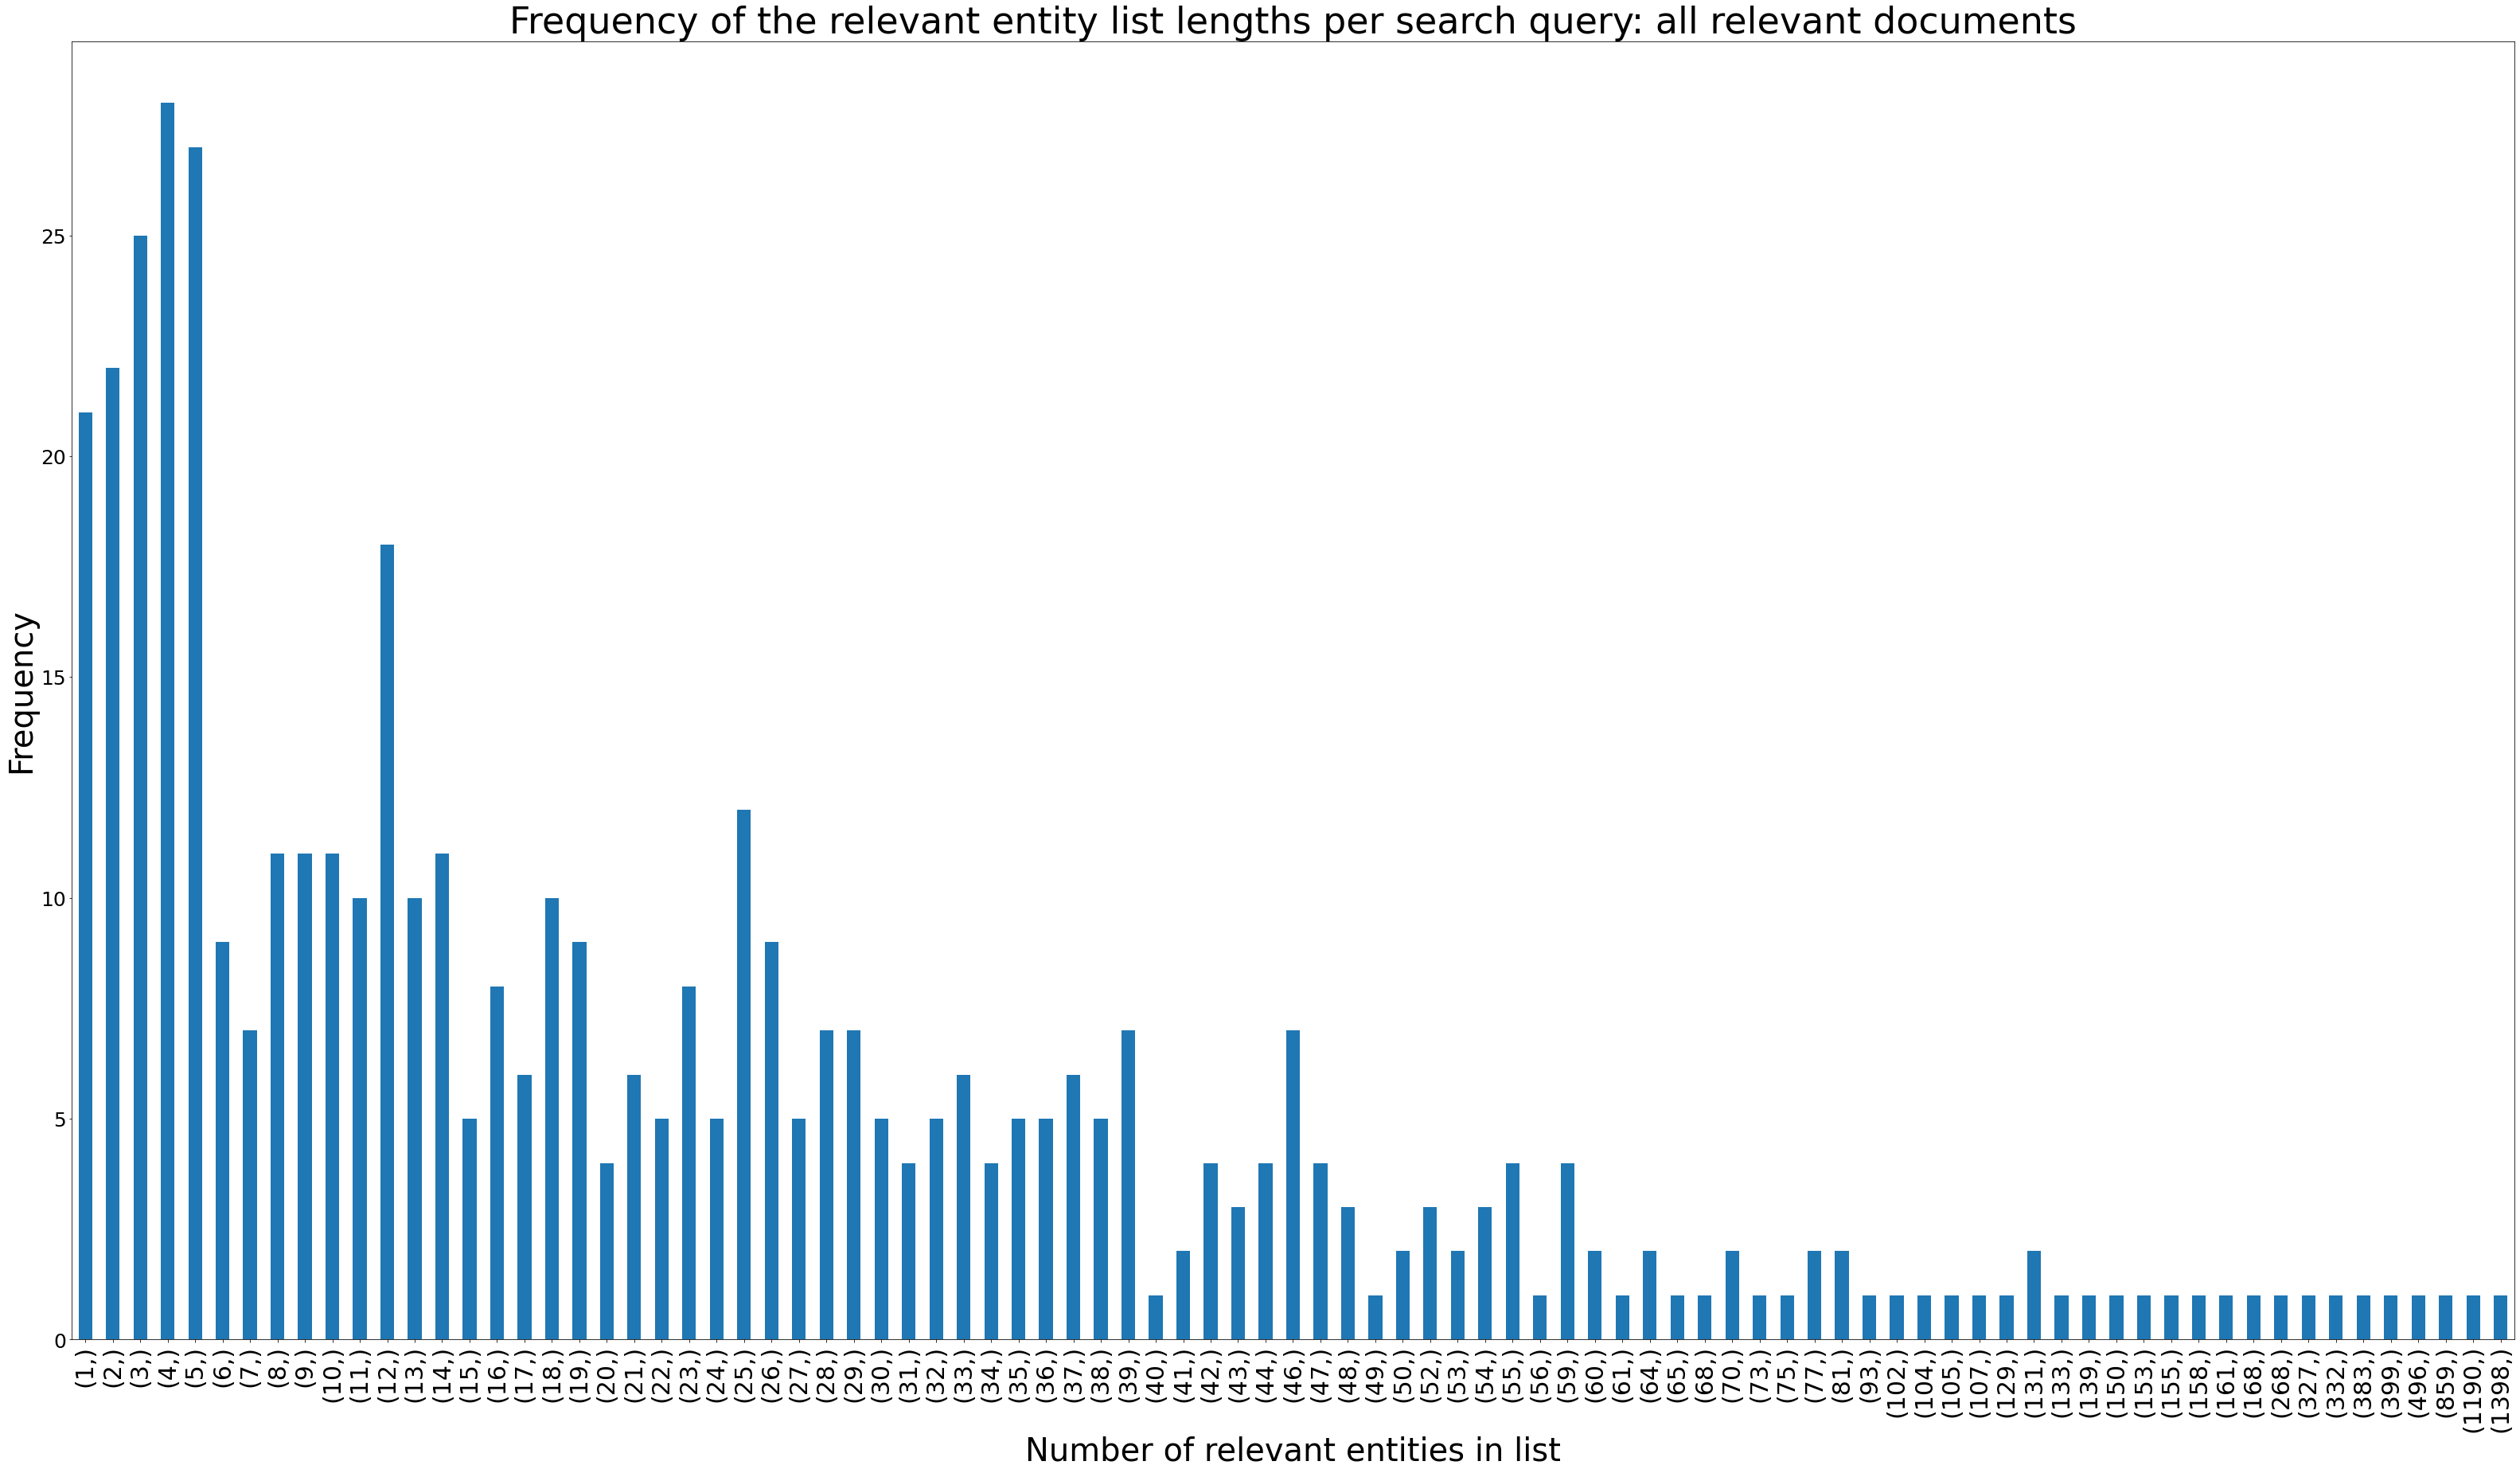

,0
263,1398
195,1190
248,859
272,496
290,399
254,383
161,332
17,327
292,268
44,168


In [76]:
# shows distrubution of the frequency of all relevant entities

from matplotlib import pyplot as plt  

data = pd.DataFrame(len_total_entities).value_counts().sort_index()

plt.figure(figsize=(55,30))
data.plot(kind='bar')
plt.title('Frequency of the relevant entity list lengths per search query: all relevant documents', fontsize=46)
plt.xlabel('Number of relevant entities in list', fontsize=40)
plt.ylabel('Frequency', fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.show()
# fig.savefig('test.jpg')


# 20 largest relevant entities list sizes per search query
display(pd.DataFrame(len_total_entities).nlargest(20,0))


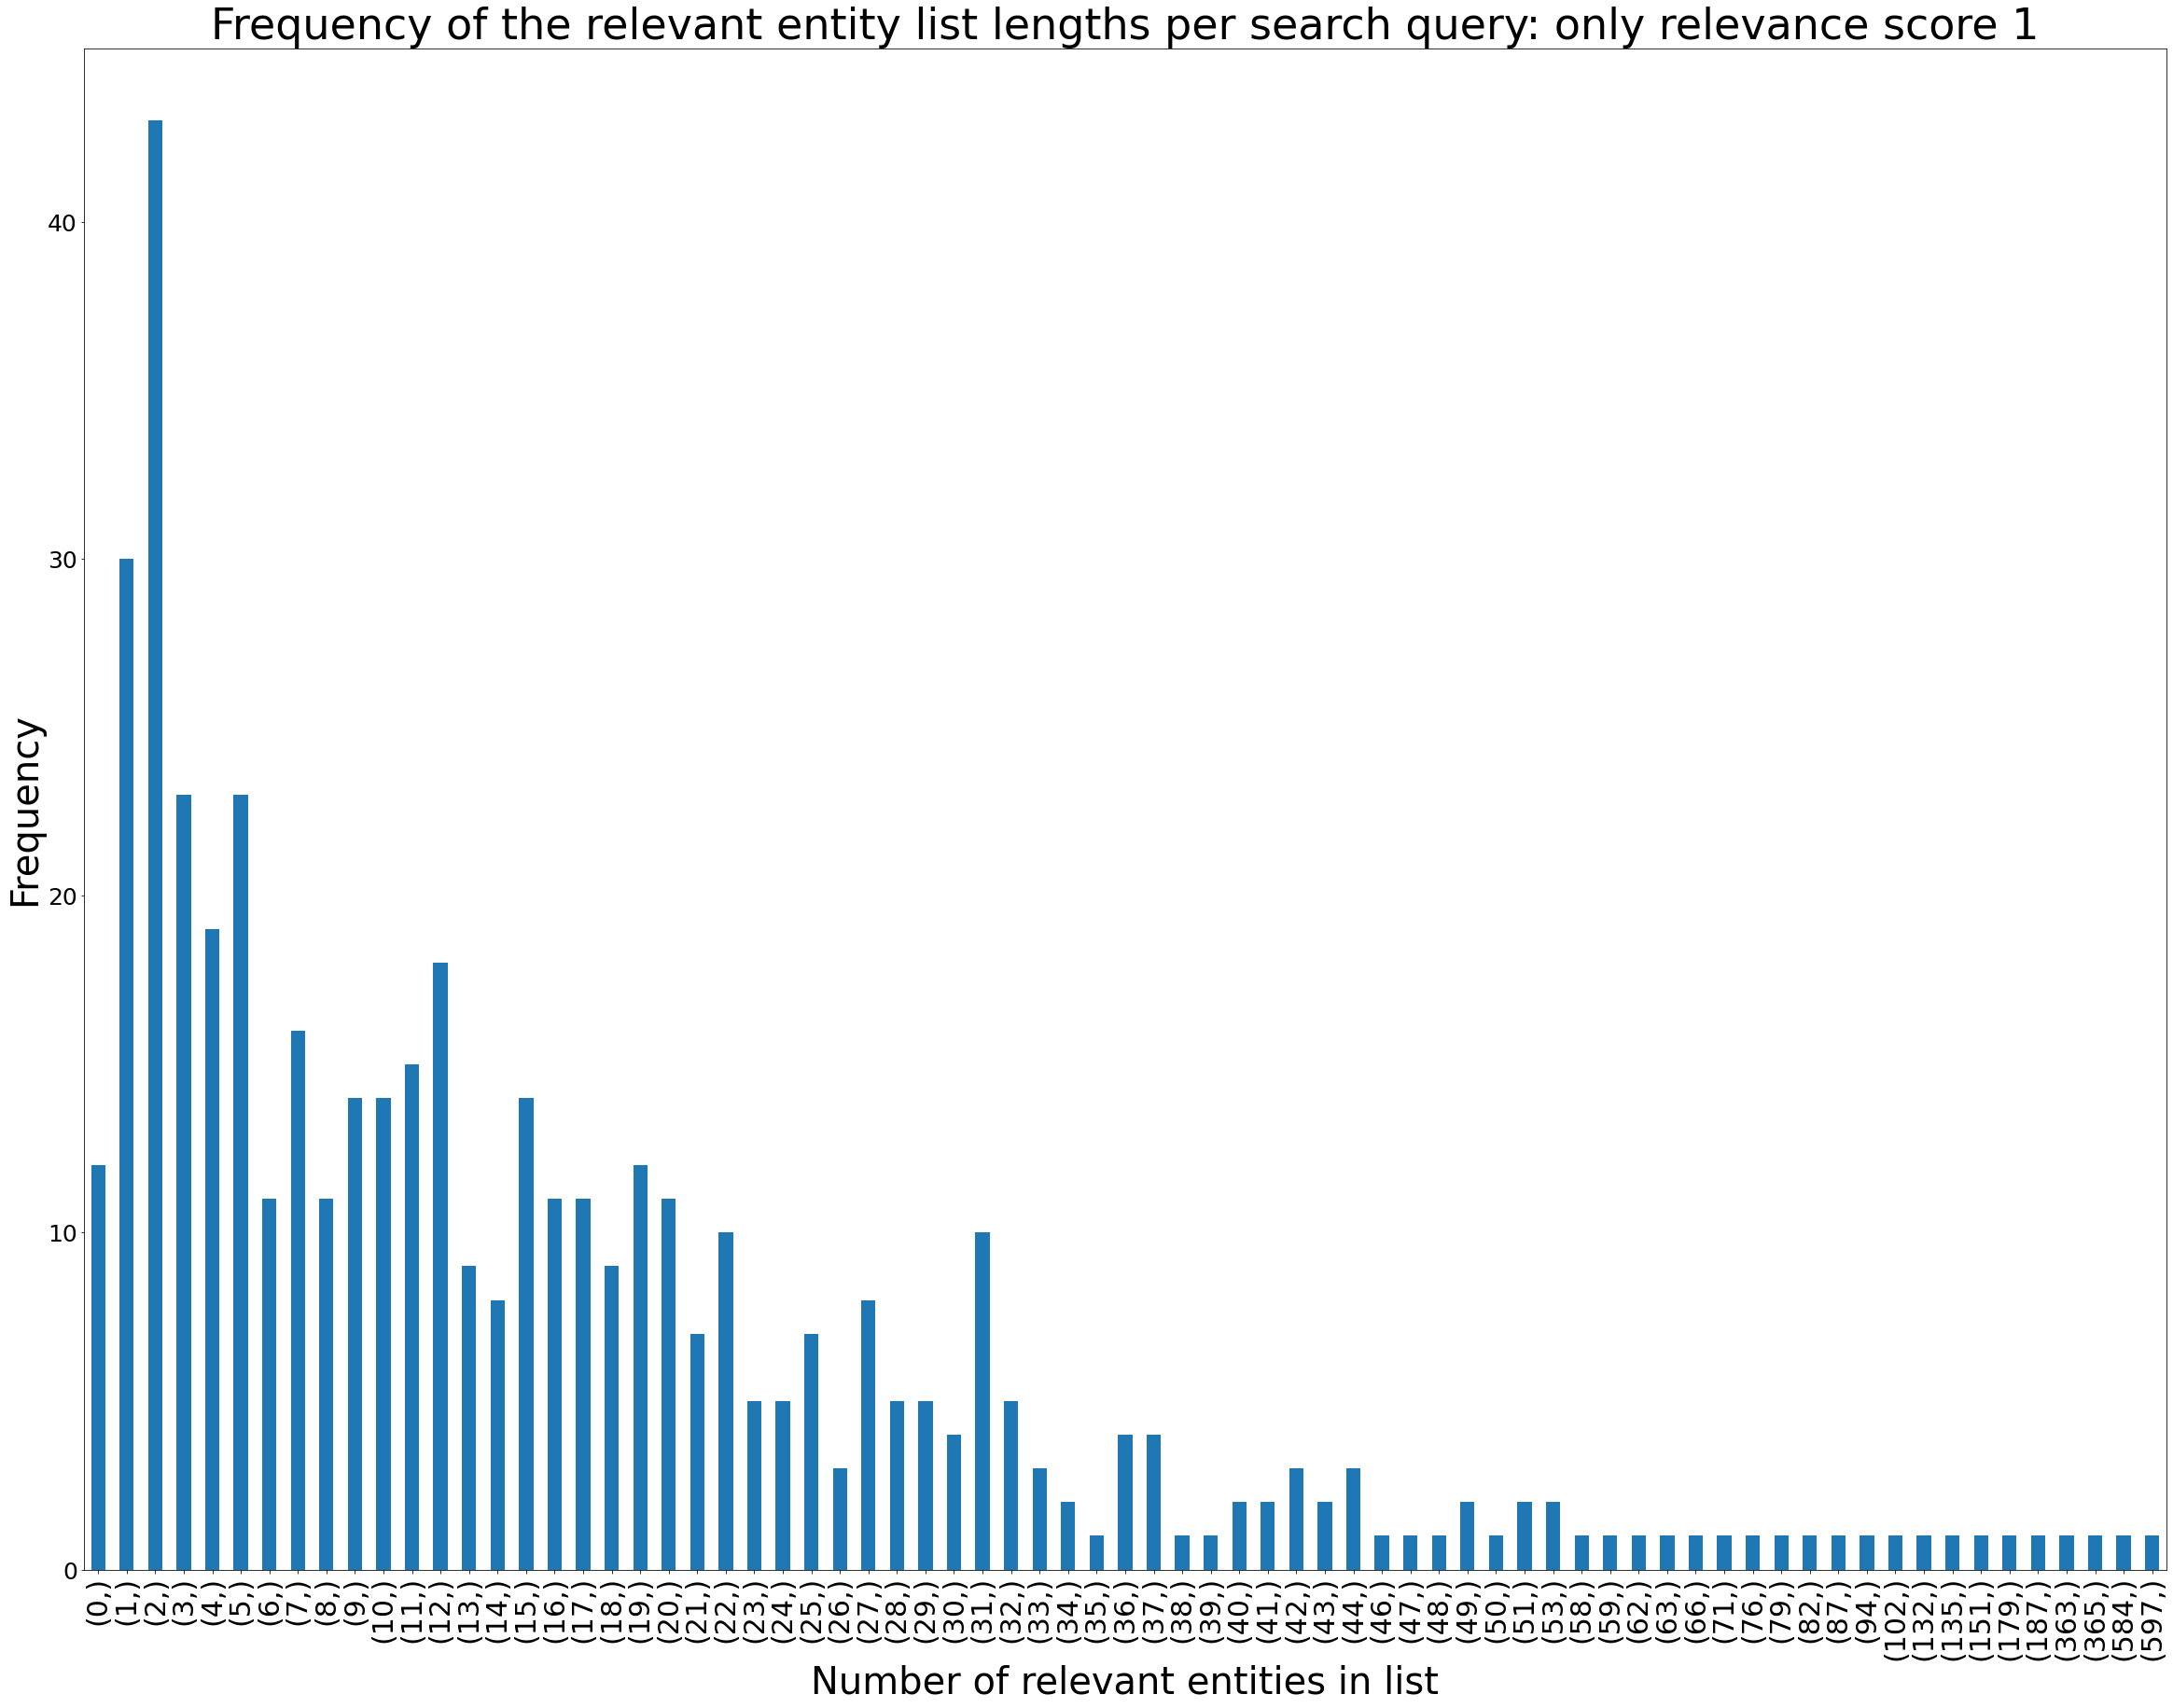

In [77]:
# shows distrubution of the frequency of all relevant entities


plt.figure(figsize=(40,30))
data1.plot(kind='bar')
plt.title('Frequency of the relevant entity list lengths per search query: only relevance score 1', fontsize=46)
plt.xlabel('Number of relevant entities in list', fontsize=40)
plt.ylabel('Frequency', fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.show()
# fig.savefig('test.jpg')

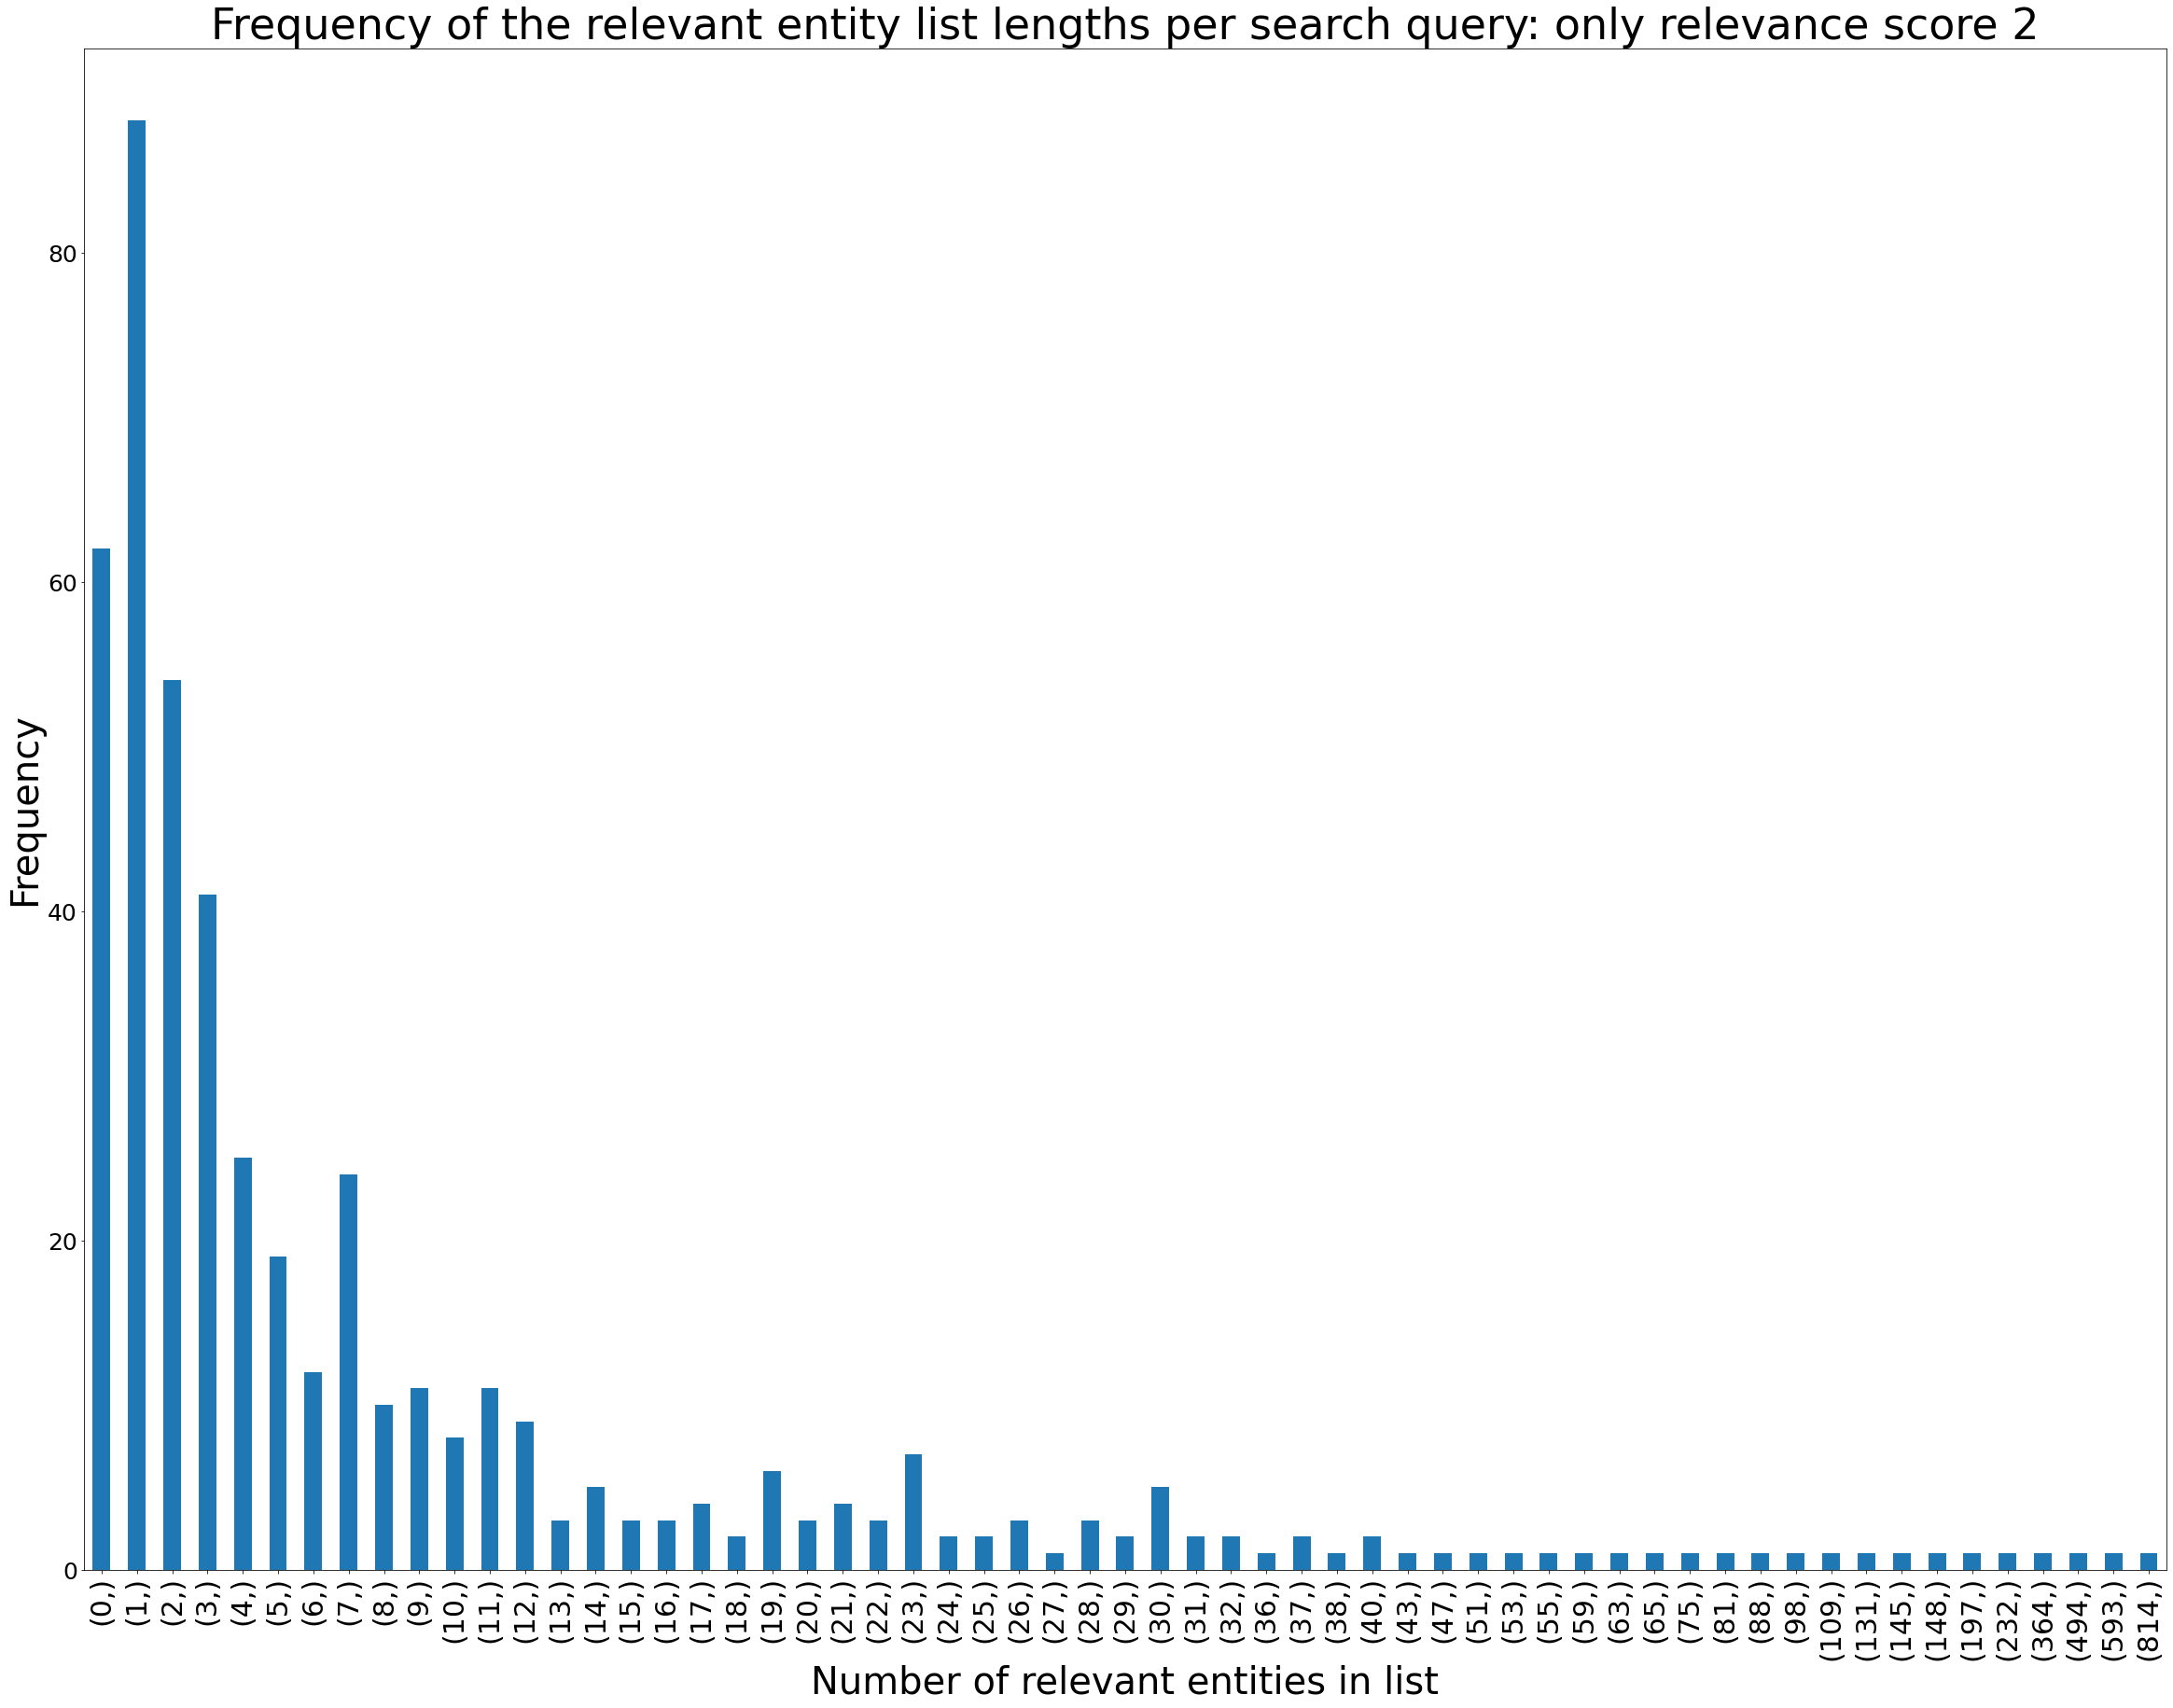

In [70]:
# shows distrubution of the frequency of all relevant entities

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(40,30))
data2.plot(kind='bar')
plt.title('Frequency of the relevant entity list lengths per search query: only relevance score 2', fontsize=46)
plt.xlabel('Number of relevant entities in list', fontsize=40)
plt.ylabel('Frequency', fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.show()
# fig.savefig('test.jpg')

---- queryID ---
QALD2_tr-59        1398
QALD2_te-63        1190
QALD2_tr-41         859
QALD2_tr-70         496
QALD2_tr-89         399
                   ... 
INEX_LD-2012359       1
SemSearch_ES-40       1
QALD2_te-53           1
QALD2_tr-18           1
SemSearch_ES-75       1
Name: queryID, Length: 467, dtype: int64


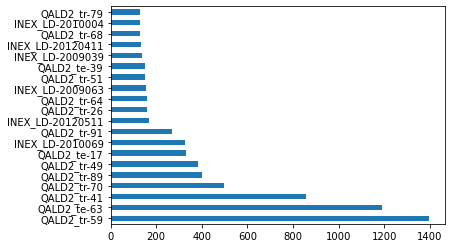

<Figure size 2160x1440 with 0 Axes>

---- Q0 ---
Q0    16700
Name: Q0, dtype: int64


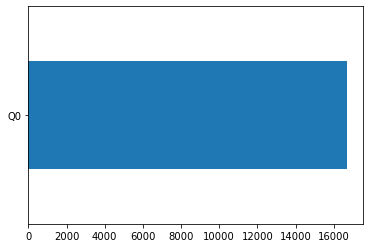

<Figure size 2160x1440 with 0 Axes>

---- targetEntity ---
<dbpedia:Netherlands>           7
<dbpedia:Italy>                 6
<dbpedia:United_Kingdom>        5
<dbpedia:Argentine_tango>       5
<dbpedia:Belgium>               5
                               ..
<dbpedia:Rachael_Ray>           1
<dbpedia:Duff_Goldman>          1
<dbpedia:Bob_Blumer>            1
<dbpedia:Alex_Guarnaschelli>    1
<dbpedia:Antônio_Meneses>       1
Name: targetEntity, Length: 16191, dtype: int64


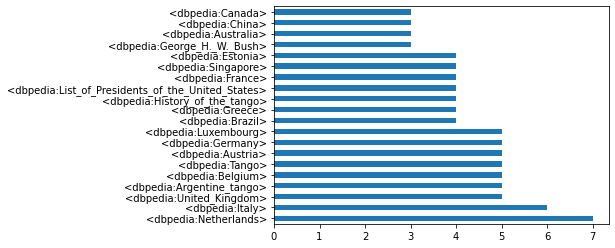

<Figure size 2160x1440 with 0 Axes>

---- relevanceScore ---
1    9813
2    6887
Name: relevanceScore, dtype: int64


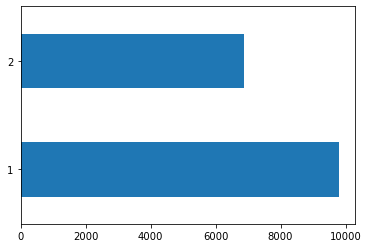

<Figure size 2160x1440 with 0 Axes>

In [33]:
for c in test_relevancescores.columns:
  print(f"---- {c} ---")
  top = test_relevancescores[c].value_counts().sort_values(ascending=False)
  print(top)
  top[:20].plot(kind = 'barh')
  plt.figure(figsize=(30,20))
  plt.show()

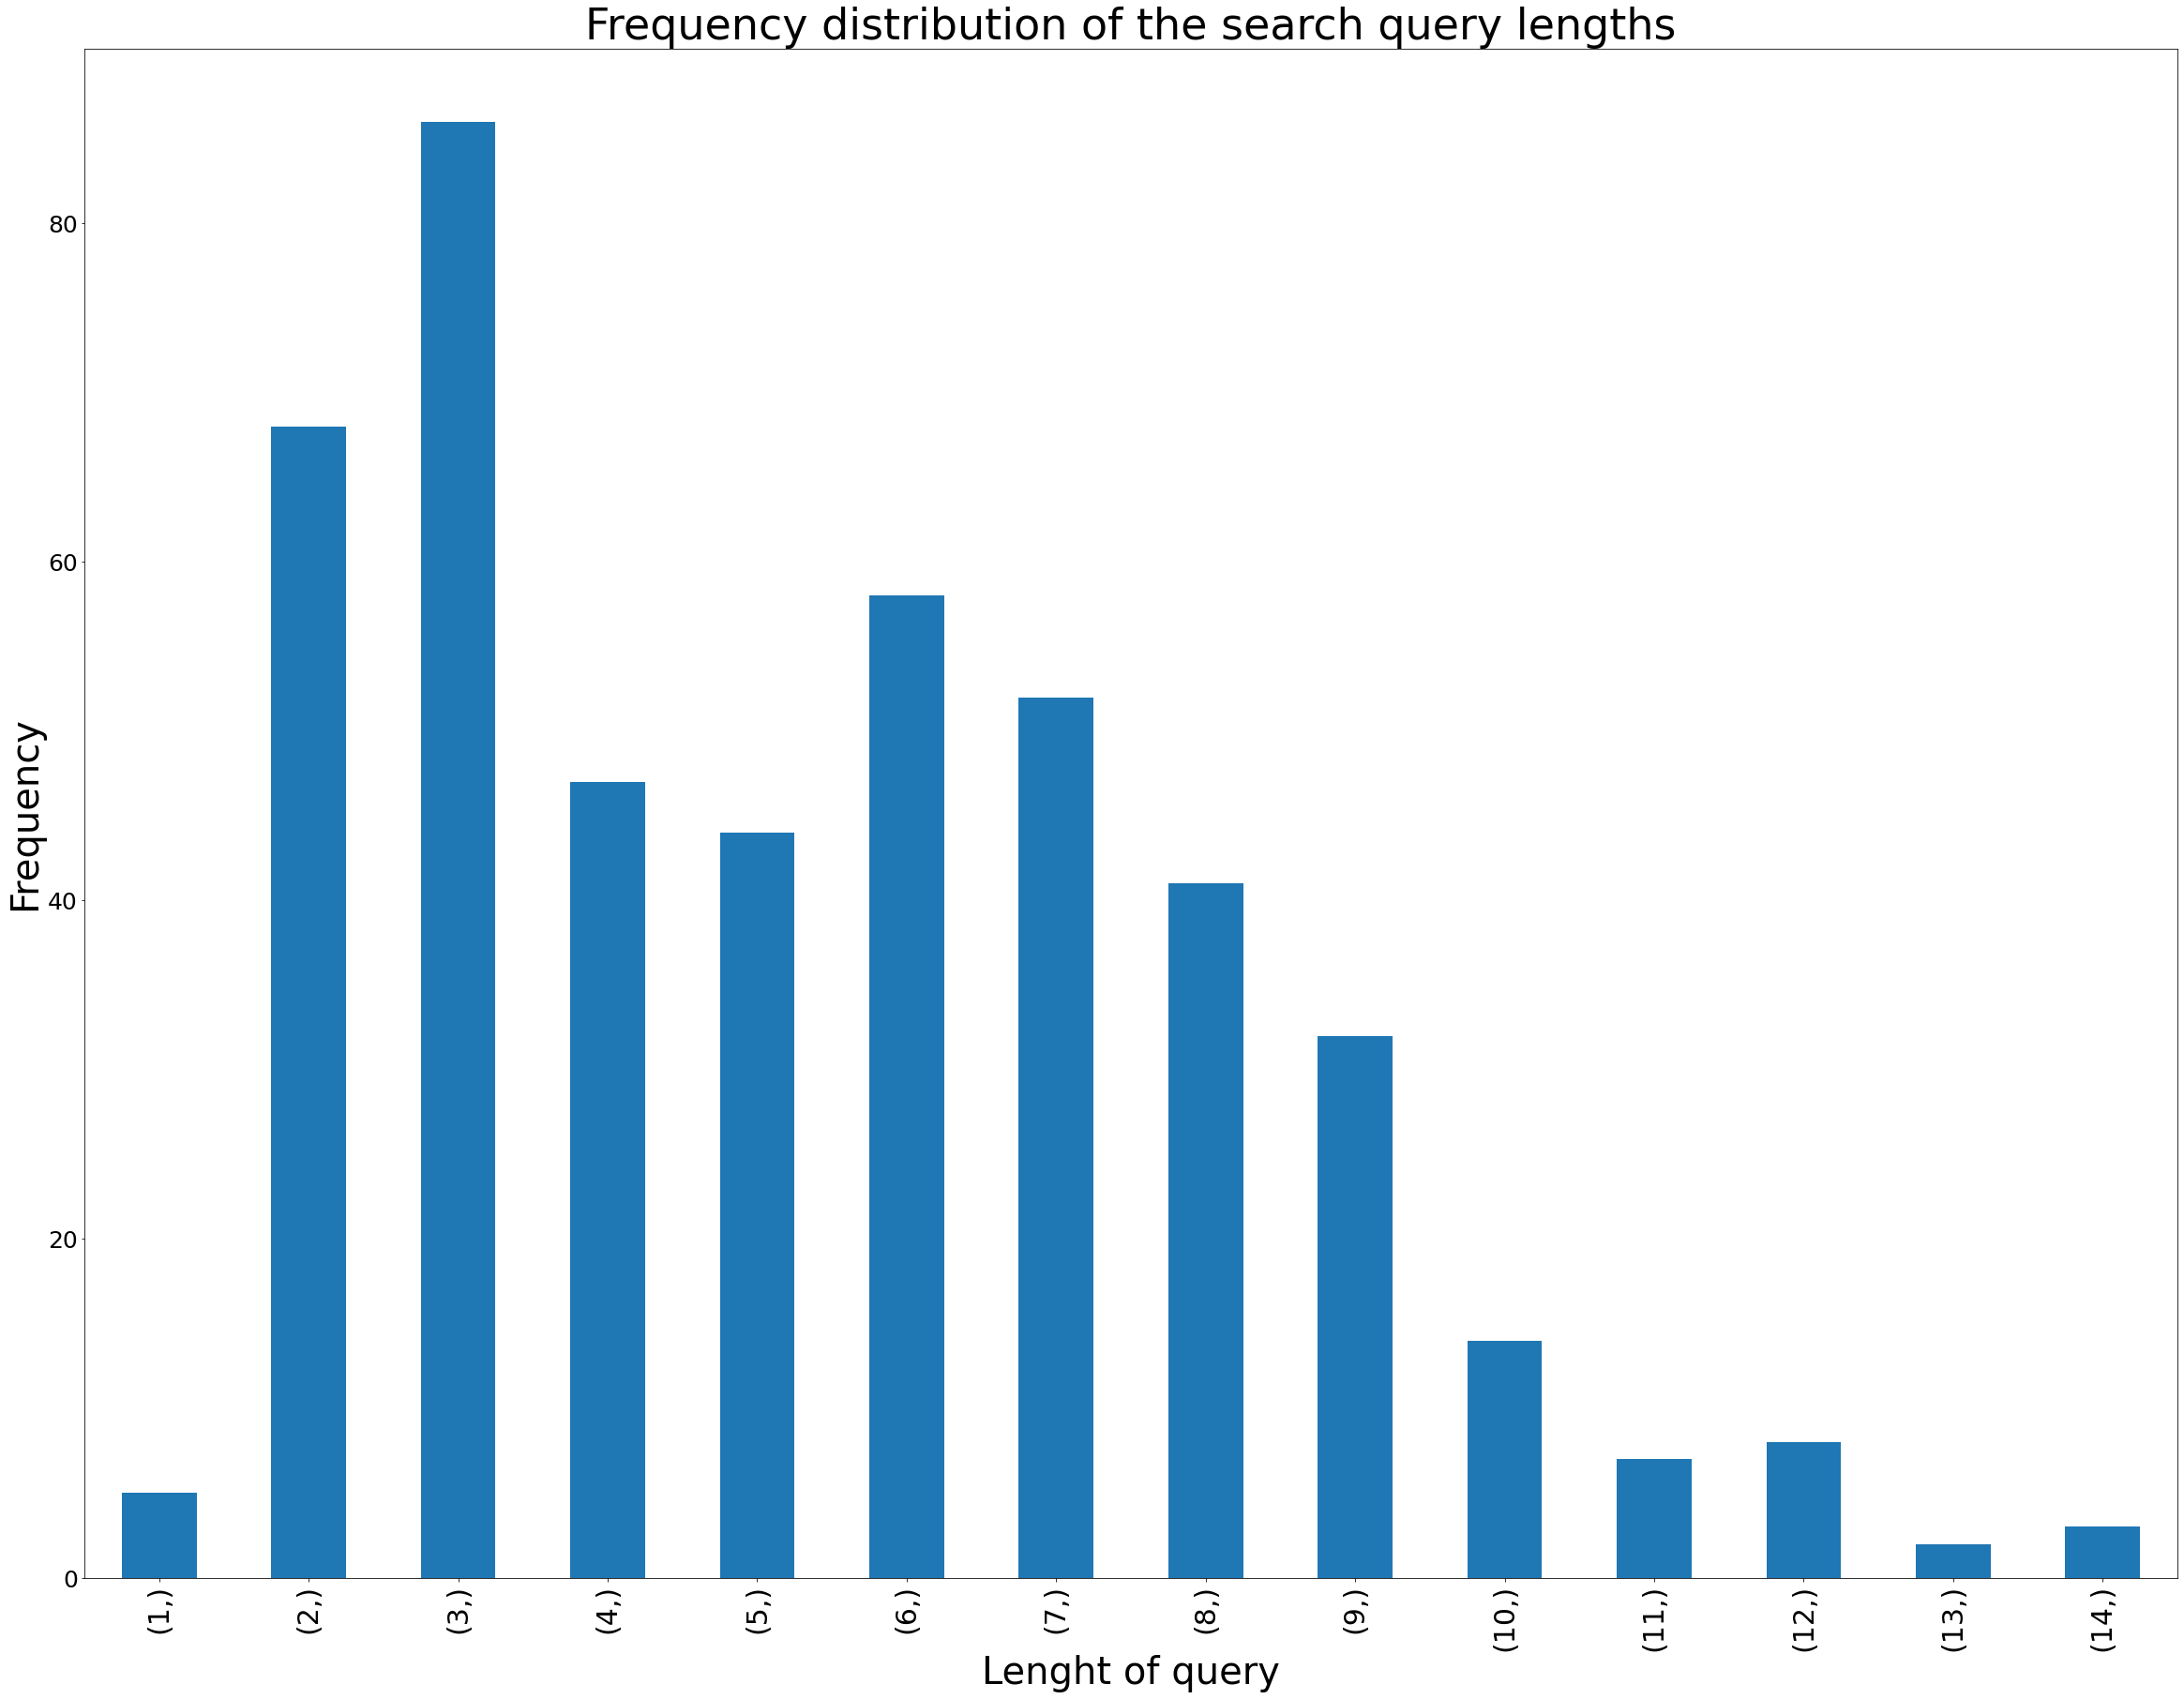

In [88]:
# query token lenght

len_queries = [len(i.split()) for i in test_queries['query']]

from matplotlib import pyplot as plt   
data = pd.DataFrame(len_queries).value_counts().sort_index()
plt.figure(figsize=(40,30))
data.plot(kind='bar')
# data.plot(kind='line', linewidth=7.0)
plt.title('Frequency distribution of the search query lengths', fontsize=46)
plt.xlabel('Lenght of query', fontsize=40)
plt.ylabel('Frequency', fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
plt.show()
# fig.savefig('test.jpg')

In [35]:
from wordcloud import WordCloud
def plot_wordcloud(df, title_str):
    wordcloud = WordCloud(max_font_size=50, max_words=2000, background_color="white").generate(" ".join(df[0]))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    print(title_str)
    plt.show()

Wordcloud of Queries in Evaluation Dataset


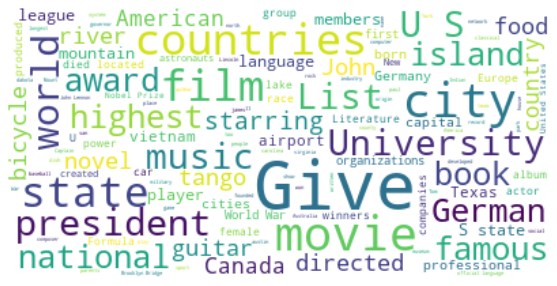

In [36]:
# word clout
queries = [i for i in test_queries['query']]
df_queries = pd.DataFrame(queries)

plot_wordcloud(df_queries, 'Wordcloud of Queries in Evaluation Dataset')

In [42]:
import pickle
import bz2

eval_dbpedia = pickle.load(bz2.BZ2File('10-2015_DBpedia.pkl.bz2', 'rb'))


import pandas as pd
df = pd.DataFrame.from_dict(eval_dbpedia, 'index')

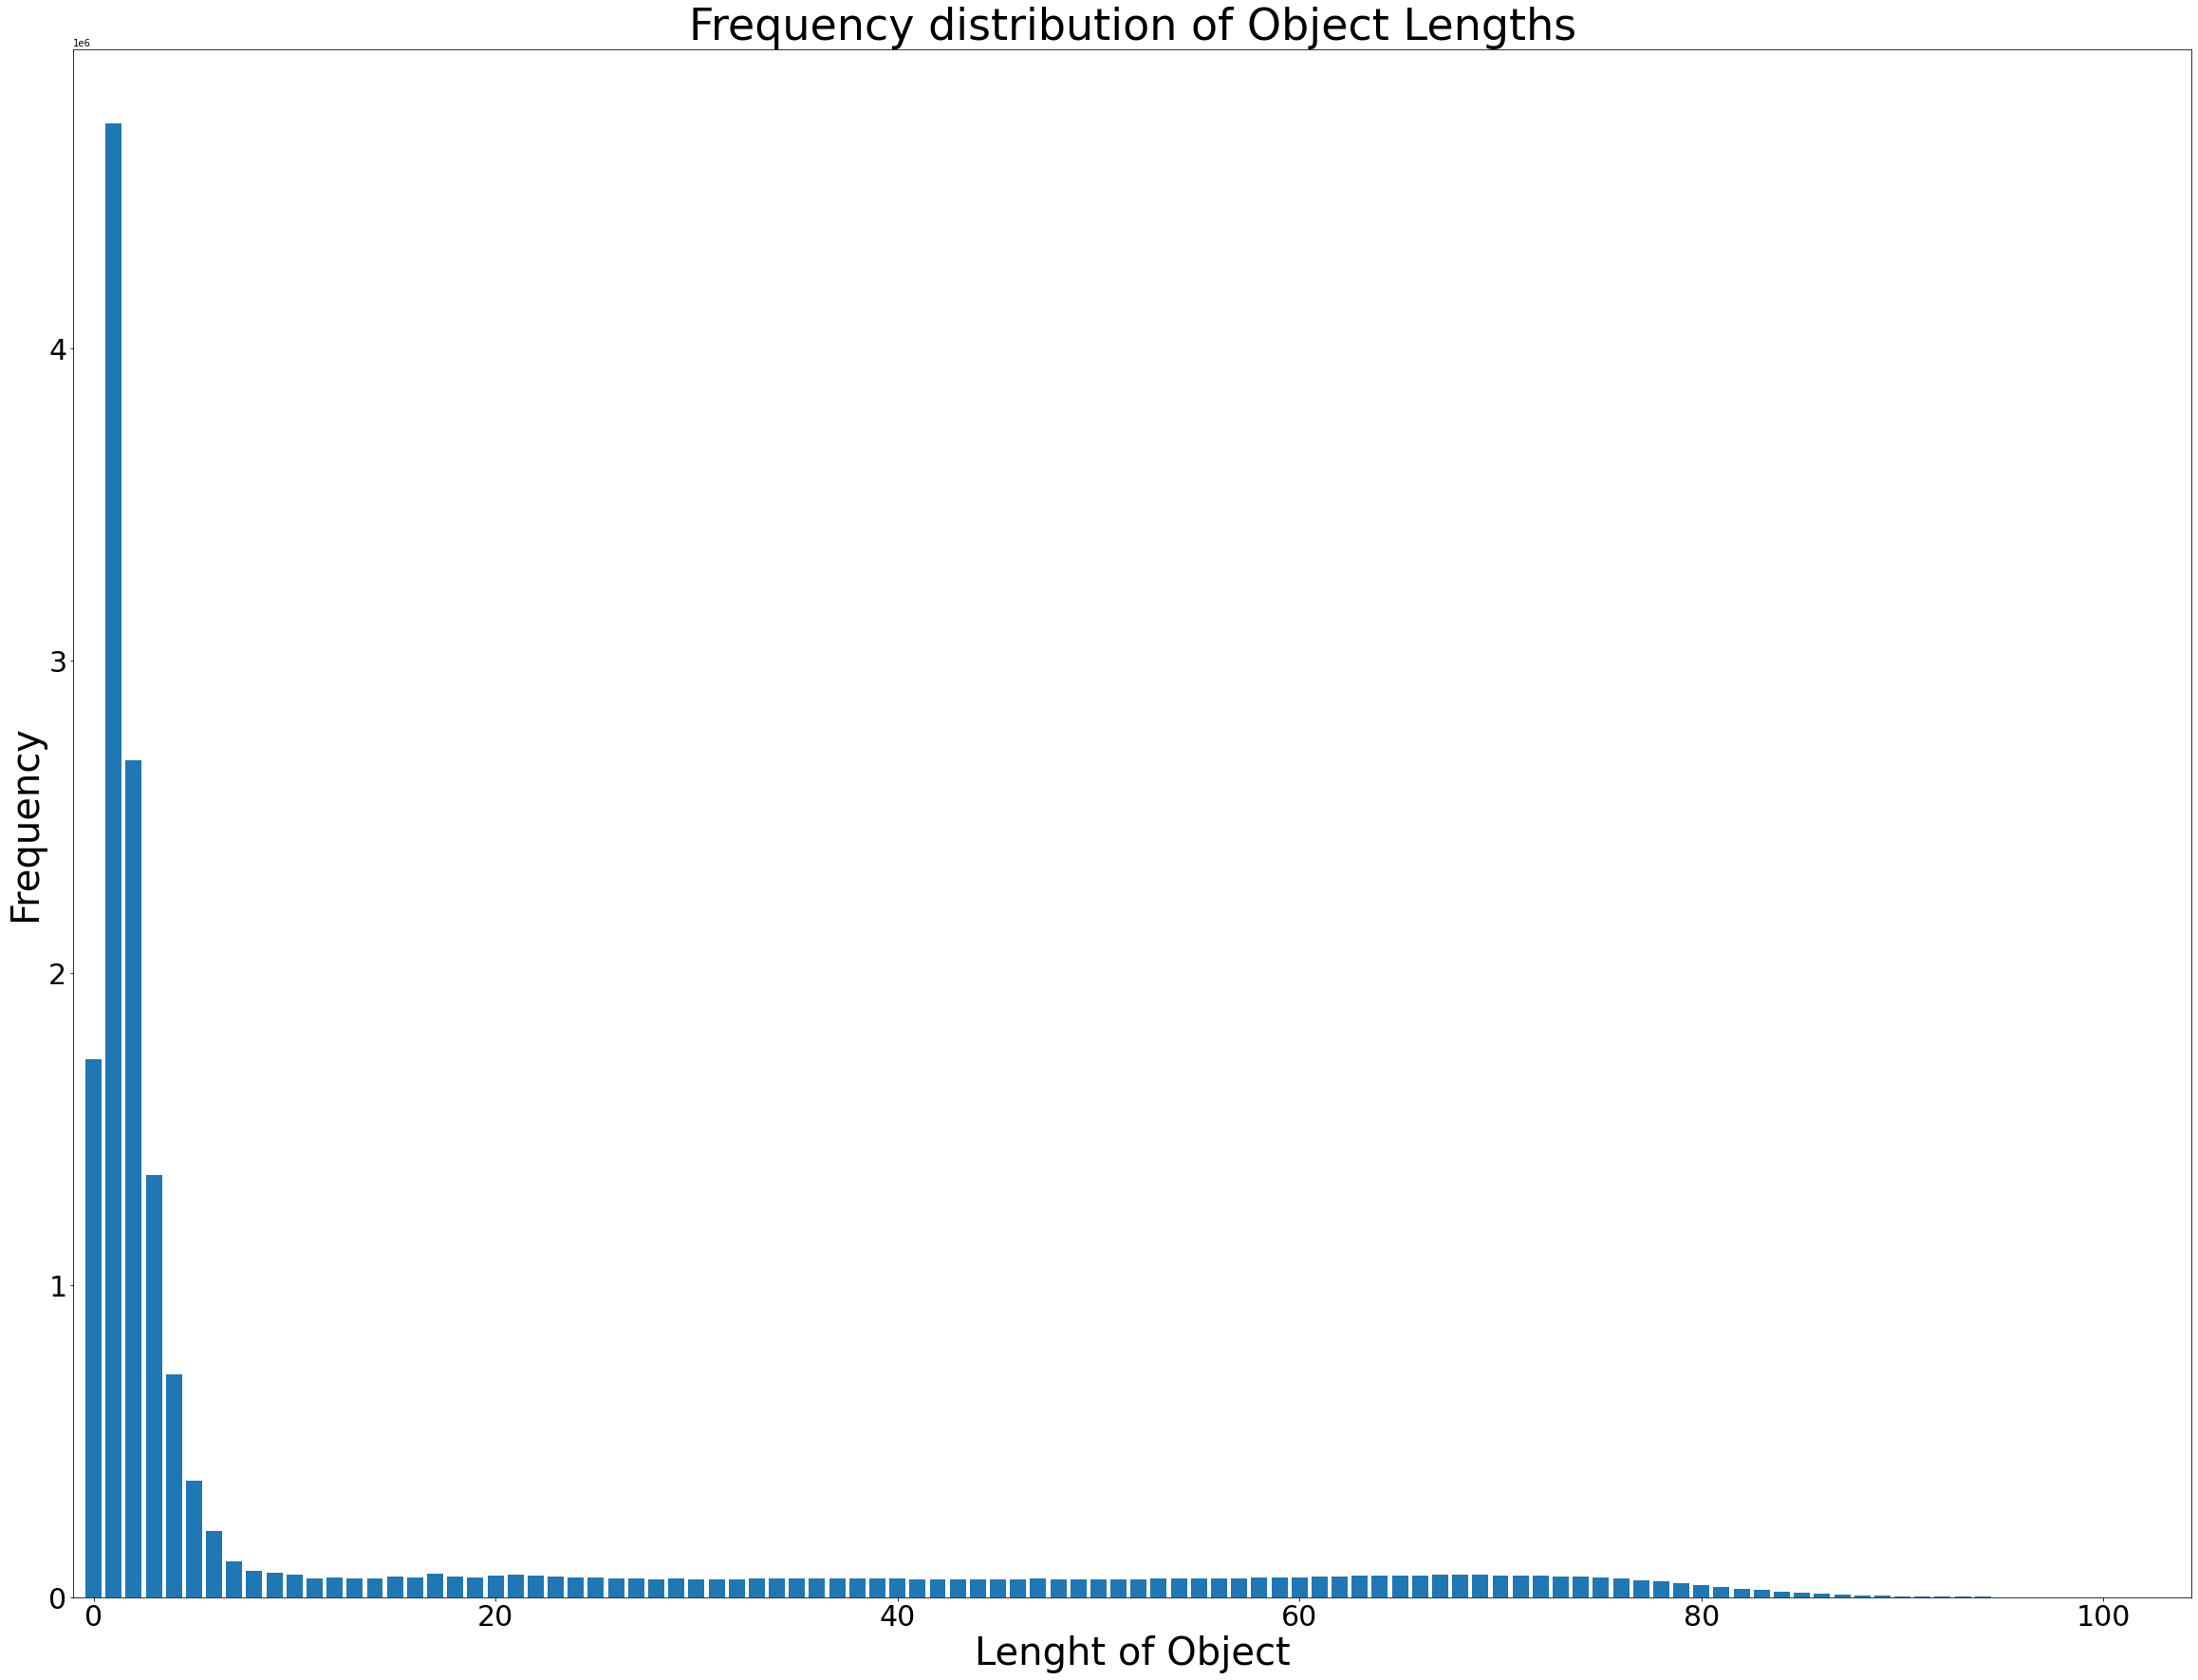

In [68]:
# frequency of len's of objects plotted ---- dbpedia_df
len_obj = [len(obj.split()) for obj in df['object']]

from matplotlib import pyplot as plt   
data = pd.Series(len_obj).value_counts().sort_index()
plt.figure(figsize=(40,30))
plt.bar(range(len(data))[:100], data[:100])
# data.plot(kind='line', linewidth=7.0)
plt.title('Frequency distribution of Object Lengths', fontsize=46)
plt.xlabel('Lenght of Object', fontsize=40)
plt.ylabel('Frequency', fontsize=40)
plt.xlim(xmin=-1)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()


In [70]:
display(data.nlargest(5), max(len_obj))

2    4721947
3    2679865
1    1724727
4    1353685
5     715369
dtype: int64

5227